### Exercice Concret Intégrant une API

#### **Scénario Global**
Le candidat doit utiliser une API publique pour récupérer des données, nettoyer et transformer ces données, puis les analyser et les visualiser. Le candidat peut utiliser une API de son choix, comme l'API de météo (OpenWeatherMap), l'API de films (OMDb), ou toute autre API publique.

#### **Étapes du Test**

1. **Récupération des Données**
   - **Tâche :** Utiliser une API publique pour récupérer des données.
   - **Scénario possible :** Utiliser l'API OpenWeatherMap pour récupérer les données météorologiques de la semaine dernière pour une ville spécifique.

2. **Nettoyage et Transformation des Données**
   - **Tâche :** Nettoyer et transformer les données récupérées pour une analyse ultérieure.
   - **Scénario possible :** Extraire les températures quotidiennes et les dates des données récupérées.

3. **Analyse des Données**
   - **Tâche :** Analyser les données pour extraire des insights.
   - **Scénario possible :** Calculer la température moyenne de la semaine.

4. **Visualisation des Données**
   - **Tâche :** Créer des visualisations des données pour les présenter de manière claire.
   - **Scénario possible :** Créer un graphique montrant l'évolution des températures au cours de la semaine.
  
5. **Documentation et Explications**
   - **Tâche :** Documenter le code et expliquer les choix faits.
   - **Contrainte :** Le candidat doit ajouter des commentaires dans le code et fournir une explication de chaque étape.

### Résumé des Compétences Évaluées
- **Utilisation des API :** Compréhension des requêtes HTTP et des formats de données (JSON).
- **Nettoyage des Données :** Transformer les données avec utilisation de librairie python dédié.
- **Analyse des Données :** Calcul de métriques simples et extraction d'insights.
- **Visualisation des Données :** Créer des graphiques avec utilisation de librairie python.
- **Documentation et Communication :** Clarté du code et capacité à expliquer les processus.

# Goals

My goal on this test is to provide insights on the watching habits of users during different time seasons
To  make this happend  we will make the following protocole
- Choose an API wich gather informations about the views of a film according to a specific periode of time, and specific information about the user such as movies preferencie and others
- Explore the data and build a coherent dataset
- Get some insight numbers first of all to present the data second correlated to the task
- Present the result in a comprehensive and insight full way

  We will create an ETL pipe line
  - Extract data from API
  - Transform data
  - Load in CSV

# SETTINGS

In [2]:
# Main imports
import pandas as pd
from tqdm import tqdm
from datetime import datetime as dt
import matplotlib.pyplot as plt

c:\Users\Lounkokobi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Pandas configuration
pd.set_option('display.max_rows',200)
tqdm.pandas()


In [5]:
# load the dataset with csv
Traktdataset = pd.read_csv("./datasets/traktDataSet_35k_bis.csv")

Traktdataset

,id_user,location,age,last_watched_at,genre_film,season
0,alexdefeche,"Neupre, Wallonia",28.0,2023-09-14 12:56:25+00:00,science-fiction,Autumn
1,alexdefeche,"Neupre, Wallonia",28.0,2023-09-14 12:55:11+00:00,animation,Autumn
2,alexdefeche,"Neupre, Wallonia",28.0,2023-09-18 14:32:43+00:00,drama,Autumn
3,alexdefeche,"Neupre, Wallonia",28.0,2023-09-14 10:51:32+00:00,adventure,Autumn
4,alexdefeche,"Neupre, Wallonia",28.0,2023-09-14 12:42:07+00:00,adventure,Autumn
...,...,...,...,...,...,...
35978,movie_mike,Chicago,54.0,2011-05-18 04:50:39+00:00,horror,Spring
35979,movie_mike,Chicago,54.0,2013-01-30 01:30:30+00:00,horror,Winter
35980,movie_mike,Chicago,54.0,2011-03-14 04:53:41+00:00,horror,Spring
35981,movie_mike,Chicago,54.0,2012-01-16 00:33:04+00:00,science-fiction,Winter


# DATA ANALYSIS

In [6]:
# Estimate the number of unique user in the set
users_data = Traktdataset["id_user"].nunique()
print("=> Le jeu de données compte", users_data, "personnes venant des pays du nord.")

=> The dataset counts 41 people. comming from northen contries


In [7]:
# Estimate the number of unique user in the set
date1 = dt.strptime(Traktdataset["last_watched_at"].min(), "%Y-%m-%d %H:%M:%S%z")
date2 = dt.strptime(Traktdataset["last_watched_at"].max(), "%Y-%m-%d %H:%M:%S%z")
print("=> Les résultats ont été obtenus sur", (int(date2.year) - int(date1.year)), "années, de", date1.year, "à", date2.year)

=> Results has been for 24 years from 2000 to 2024


In [ ]:
# Calculate the total watch numbers
watch_numbers = len(Traktdataset)
print("=> Le nombre total de films visionnés est de", watch_numbers)

=> The total number of movies that has been watched is  35983


=> Le nombre d'émissions visionnées par saisons


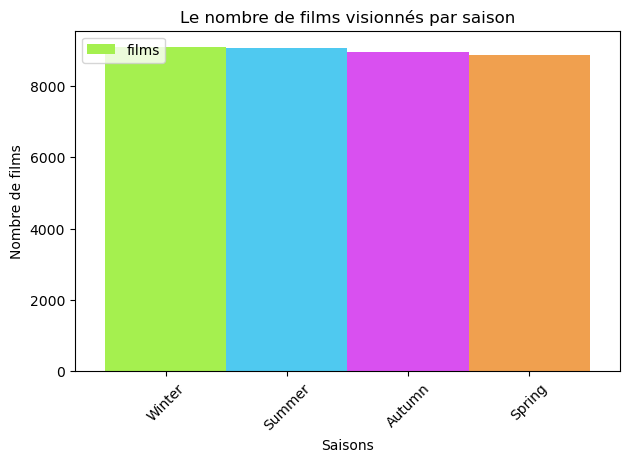

season
Winter    9097
Summer    9077
Autumn    8940
Spring    8869
Name: count, dtype: int64


In [17]:
# caluculate the number of show seen per seson
print("=> Le nombre d'émissions visionnées par saisons")
counts = Traktdataset['season'].value_counts()
ax = counts.plot(title='' ,
            kind='bar', 
            color=['#A5F04F', '#4FC9F0', '#D950F0', '#F0A04F'],
            legend='vues',
            width=1)

plt.title('Le nombre de films visionnés par saison')
plt.xlabel('Saisons')
plt.ylabel('Nombre de films')
plt.legend(['films','films','films','films'], loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()
print(counts)

=> Le nombre de vues par genre


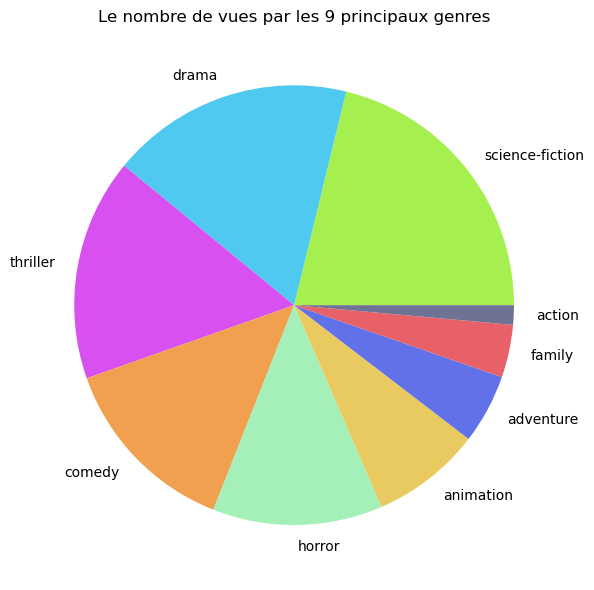

genre_film
science-fiction    6666
drama              5625
thriller           5138
comedy             4285
horror             3931
animation          2542
adventure          1606
family             1219
action              450
Name: count, dtype: int64


In [18]:
# The number of movies viewed per seasons
print("=> Le nombre de vues par genre")
fig, ax1 = plt.subplots(1,1, figsize=(12, 6))
counts2 = Traktdataset['genre_film'].value_counts()
counts2[0:9].plot.pie(ax=ax1, colors=['#A5F04F', 
                                      '#4FC9F0', 
                                      '#D950F0', 
                                      '#F0A04F',
                                      '#A5F0B8',
                                      '#E8CA61',
                                      '#6171E8',
                                      '#E86169',
                                      '#6F7393',
                                      '#5C695F',
                                      '#719694'])

ax1.set_title('Le nombre de vues par les 9 principaux genres')
plt.tight_layout()
plt.xlabel("")
plt.ylabel("")

plt.show()
print(counts2[0:9])

=> Le nombre de vues par emplacement 


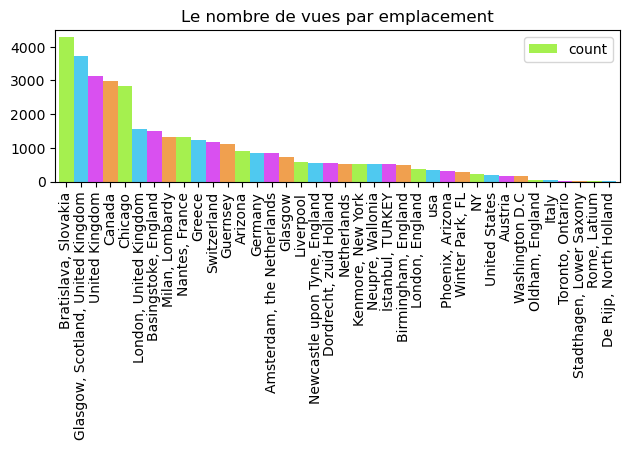

location
Bratislava, Slovakia                 4283
Glasgow, Scotland, United Kingdom    3718
United Kingdom                       3117
Canada                               2986
Chicago                              2833
London, United Kingdom               1563
Basingstoke, England                 1503
Milan, Lombardy                      1325
Nantes, France                       1323
Greece                               1239
Switzerland                          1168
Guernsey                             1124
Arizona                               914
Germany                               859
Amsterdam, the Netherlands            846
Glasgow                               721
Liverpool                             593
Newcastle upon Tyne, England          556
Dordrecht, zuid Holland               556
Netherlands                           533
Kenmore, New York                     530
Neupre, Wallonia                      517
İstanbul, TURKEY                      512
Birmingham, England      

In [19]:
# number of views by location
print("=> Le nombre de vues par emplacement ")
counts3 = Traktdataset['location'].value_counts()
ax = counts3.plot(title='' ,
            kind='bar', 
            color=['#A5F04F', '#4FC9F0', '#D950F0', '#F0A04F'],
            legend='vues',
            width=1)
plt.title('Le nombre de vues par emplacement')
plt.tight_layout()
plt.xlabel("")
plt.ylabel("")
plt.show()
print(counts3)

=> Genres du printemps 
genre_film
science-fiction    1706
drama              1426
thriller           1383
comedy             1134
horror              816
Name: count, dtype: int64


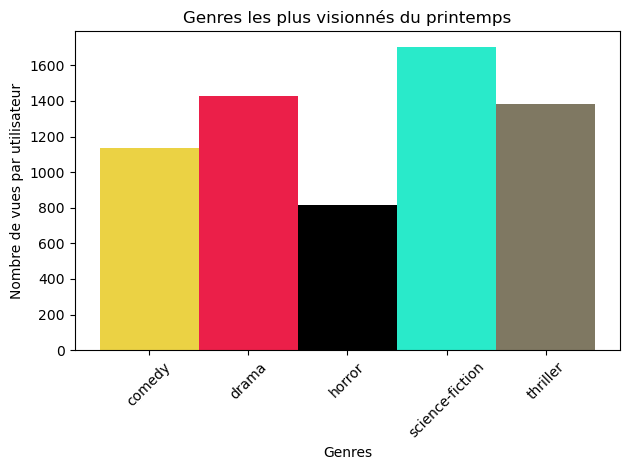

In [23]:
# Spring most viewed
try:
    print("=> Genres du printemps ")
    sprinDataSet = Traktdataset.loc[Traktdataset['season'] == 'Spring']
    springCounts = sprinDataSet['genre_film'].value_counts()
    print(springCounts[0:5])
    springCounts = springCounts[0:5].sort_index()
    
    ax = springCounts[0:5].plot(
                kind='bar', 
                color=['#EBD244', '#EB1F49', '#000000', '#29EACA', '#7F7862'],
                width=1)
    
    plt.title('Genres les plus visionnés du printemps')
    plt.xlabel('Genres')
    plt.ylabel('Nombre de vues par utilisateur')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
except:
    print("Aucune donnée sur le printemps")

=> Genres d'automne 
genre_film
science-fiction    1462
drama              1382
thriller           1265
horror             1236
comedy              934
Name: count, dtype: int64


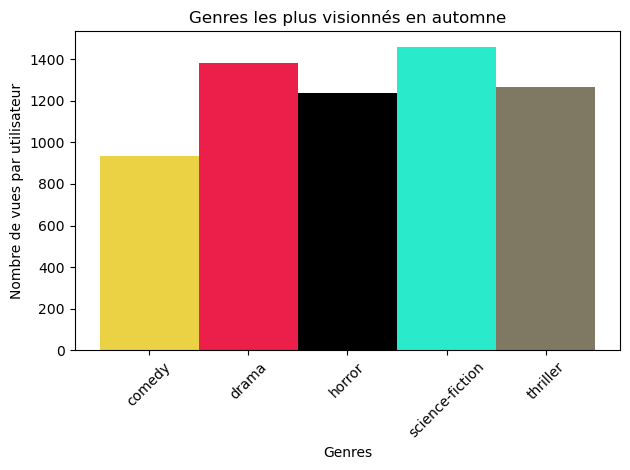

In [24]:
# Autumn most viewed
print("=> Genres d'automne ")
try:
    AutumnDataSet = Traktdataset.loc[Traktdataset['season'] == 'Autumn']
    AutumnCounts = AutumnDataSet['genre_film'].value_counts()
    print(AutumnCounts[0:5])
    AutumnCounts = AutumnCounts[0:5].sort_index()
    
    ax = AutumnCounts[0:5].plot(title='' ,
                kind='bar', 
                color=['#EBD244', '#EB1F49', '#000000', '#29EACA', '#7F7862'],
                width=1)
    
    plt.title('Genres les plus visionnés en automne')
    plt.xlabel('Genres')
    plt.ylabel('Nombre de vues par utilisateur')
    plt.xticks(rotation=45)
    
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
except:
    print("Pas de données sur l'automne")



=> Genres d'hiver 
genre_film
science-fiction    1690
drama              1517
thriller           1271
comedy             1100
horror              850
Name: count, dtype: int64


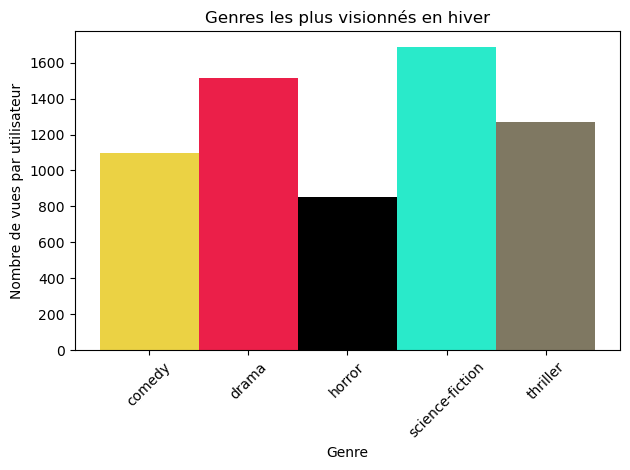

In [25]:
# Winter most viewed
print("=> Genres d'hiver ")
try:
    WinterDataSet = Traktdataset.loc[Traktdataset['season'] == 'Winter']
    WinterCounts = WinterDataSet['genre_film'].value_counts()
    print(WinterCounts[0:5])
    WinterCounts = WinterCounts[0:5].sort_index()
    
    ax = WinterCounts[0:5].plot(title='' ,
                kind='bar', 
                color=['#EBD244', '#EB1F49', '#000000', '#29EACA', '#7F7862'],
                                width=1)
    
    plt.title('Genres les plus visionnés en hiver')
    plt.xlabel('Genre')
    plt.ylabel('Nombre de vues par utilisateur')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
except:
    print("Pas de données sur l'hiver")

=> Genres de l'été 
genre_film
science-fiction    1808
drama              1300
thriller           1219
comedy             1117
horror             1029
Name: count, dtype: int64


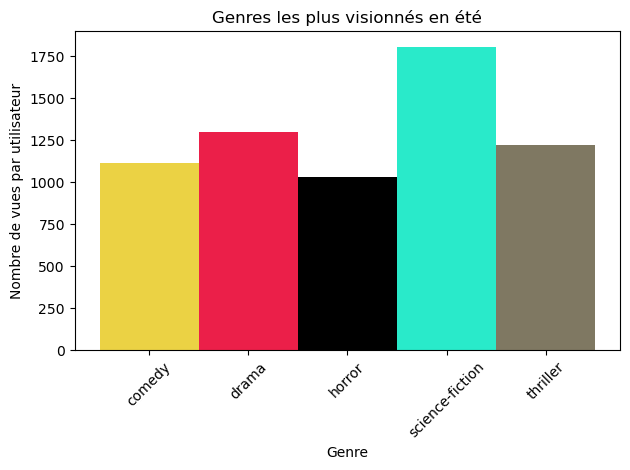

In [26]:
# Summer most viewed
print("=> Genres de l'été ")
try:
    SummerDataSet = Traktdataset.loc[Traktdataset['season'] == 'Summer']
    SummerCounts = SummerDataSet['genre_film'].value_counts()
    print(SummerCounts[0:5])
    SummerCounts = SummerCounts[0:5].sort_index()
    
    ax = SummerCounts[0:5].plot(title='' ,
                kind='bar', 
                color=['#EBD244', '#EB1F49', '#000000', '#29EACA', '#7F7862'],
                width=1)
    
    plt.title('Genres les plus visionnés en été')
    plt.xlabel('Genre')
    plt.ylabel('Nombre de vues par utilisateur')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
except:
    print("Pas de données sur l'été")

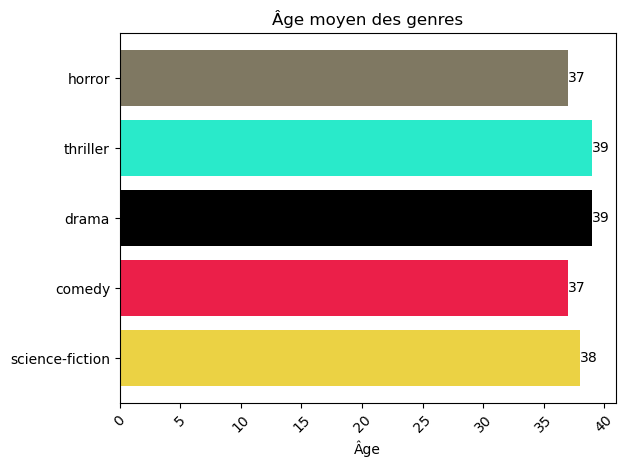

In [27]:
# Age Mean of Scifi viewers
ScifiDataSet = Traktdataset.loc[Traktdataset['genre_film'] == 'science-fiction']
mean1 = int(ScifiDataSet['age'].mean())
ComedyDataSet = Traktdataset.loc[Traktdataset['genre_film'] == 'comedy']
mean2 = int(ComedyDataSet['age'].mean())
DramaDataSet = Traktdataset.loc[Traktdataset['genre_film'] == 'drama']
mean3 = int(DramaDataSet['age'].mean())
thrillerDataSet = Traktdataset.loc[Traktdataset['genre_film'] == 'thriller']
mean4 = int(thrillerDataSet['age'].mean())
horrorDataSet = Traktdataset.loc[Traktdataset['genre_film'] == 'horror']
mean5 = int(horrorDataSet['age'].mean())

means = [mean1, mean2, mean3, mean4, mean5]
indexes = ['science-fiction', 'comedy', 'drama', 'thriller', 'horror']
colors = ['#EBD244', '#EB1F49', '#000000', '#29EACA', '#7F7862']

bars = plt.barh(indexes, means, label=indexes, color=colors)
plt.bar_label(bars)

    
plt.xlabel('Âge')
plt.title('Âge moyen des genres')
plt.xticks(rotation=45)
plt.show()